In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

In [4]:
# ortamı çağır
env = gym.make("FrozenLake-v1")
env

<TimeLimit<OrderEnforcing<FrozenLakeEnv<FrozenLake-v1>>>>

In [5]:
# Q-Table Oluştur
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
# Hyper parameter
gamma = 0.95 # indirim faktörü
alpha = 0.80 # ağırlık oranı - zamansal fark
epsilon = 0.10 # risk faktörü
# görselleştirme listesi
reward_list = []

In [8]:
# Öğrenmeye başla
episode_number = 100000 # 100000 bölüm
for i in range(1, episode_number):
    state = env.reset() # bölüm başında ortamı resetle
    reward_count = 0
    while True:
        # %10 keşif, %90 Sömürü
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        # eylem yap
        next_state, reward, done, _ = env.step(action)
        # Q öğrenem fonksiyonu
        old_value = q_table[state, action] # old value
        next_max = np.max(q_table[next_state]) # next_max
        next_value = (1 -alpha) * old_value + alpha * (reward + gamma * next_max)
        # Q tablosu güncelle
        q_table[state, action] = next_value
        # durum güncelle
        state = next_state
        # toplam ödül hesabı
        reward_count += reward
        # bölüm bittiyse yeni bölüme başla
        if done:
            break
    if i % 5000 == 0:
        print("Episode : {} ". format(i))
    if i % 1000 == 0:
        reward_list.append(reward_count)

Episode : 5000 
Episode : 10000 
Episode : 15000 
Episode : 20000 
Episode : 25000 
Episode : 30000 
Episode : 35000 
Episode : 40000 
Episode : 45000 
Episode : 50000 
Episode : 55000 
Episode : 60000 
Episode : 65000 
Episode : 70000 
Episode : 75000 
Episode : 80000 
Episode : 85000 
Episode : 90000 
Episode : 95000 


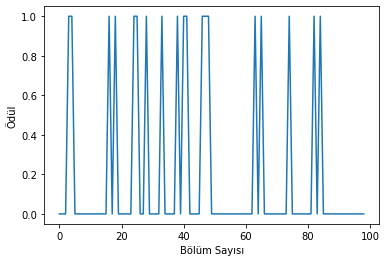

In [9]:
# Ödül görselleştirelim.
plt.figure()
plt.plot(reward_list)
plt.xlabel("Bölüm Sayısı")
plt.ylabel("Ödül")
plt.show()

In [10]:
# q_table yorumu
q_table

array([[3.43717455e-01, 8.43564123e-02, 2.52233055e-01, 9.48279927e-02],
       [1.25182162e-03, 3.12207980e-03, 2.70711406e-02, 1.32092870e-01],
       [1.31649566e-01, 7.56987210e-02, 7.15235296e-02, 8.67312336e-02],
       [4.03050007e-02, 1.85202482e-02, 3.58876373e-03, 1.20711244e-01],
       [3.53568308e-01, 1.99121286e-02, 7.34737917e-02, 4.64834310e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.45594210e-02, 1.99134559e-03, 9.86906104e-02, 1.91591465e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.89289808e-03, 1.17410536e-01, 5.13284782e-02, 5.48837355e-01],
       [2.14558920e-02, 6.35985044e-01, 1.62993674e-01, 1.30883701e-01],
       [8.00342400e-02, 1.34654868e-01, 4.54954154e-02, 5.87974106e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15824581e-01, 1.04486967e-01, 7.66911033e